In [10]:
import pandas as pd

# Load the uploaded CSV file
file_path = "C:/Users/serha/PycharmProjects/Temp/scaledData/scaledData1.csv"
df = pd.read_csv(file_path)

# Show the first few rows and summary info
df.head(), df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666228 entries, 0 to 666227
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Time Elapsed (s)         666228 non-null  float64
 1   soc                      666228 non-null  float64
 2   pack_voltage (V)         666228 non-null  float64
 3   charge_current (A)       666228 non-null  float64
 4   max_cell_voltage (V)     666228 non-null  float64
 5   min_cell_voltage (V)     666228 non-null  float64
 6   max_temperature (℃)      666228 non-null  int64  
 7   min_temperature (℃)      666228 non-null  int64  
 8   available_capacity (Ah)  666228 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 45.7 MB


(   Time Elapsed (s)        soc  pack_voltage (V)  charge_current (A)  \
 0               0.0  96.430364        928.018182         -169.746054   
 1               8.0  96.430364        928.018182         -169.746054   
 2              16.0  96.430364        928.454545         -169.746054   
 3              24.0  96.430364        928.454545         -169.746054   
 4           21707.0  32.113765        815.872727         -811.778428   
 
    max_cell_voltage (V)  min_cell_voltage (V)  max_temperature (℃)  \
 0                 4.239                 4.227                   44   
 1                 4.240                 4.227                   44   
 2                 4.240                 4.227                   44   
 3                 4.241                 4.228                   44   
 4                 3.680                 3.656                   39   
 
    min_temperature (℃)  available_capacity (Ah)  
 0                   41              1199.968349  
 1                   41       

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Separate features and target
X = df_cleaned.drop(columns=["available_capacity (Ah)"])
y = df_cleaned["available_capacity (Ah)"]

# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for CNN: (samples, height, width, channels)
# Here we treat each sample as a "1D image" with shape (num_features, 1)
X_cnn = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_cnn, y, test_size=0.2, random_state=42, shuffle=False)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((532982, 7, 1), (133246, 7, 1), (532982,), (133246,))

In [12]:
y_train

0         1199.968349
1         1199.968349
2         1199.968349
3         1199.968349
4         1199.968349
             ...     
532977    1065.601324
532978    1065.601324
532979    1065.601324
532980    1065.601324
532981    1065.601324
Name: available_capacity (Ah), Length: 532982, dtype: float64

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Build a simple CNN model for regression
model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(8, 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=2, activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1)  # Regression output
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=256,
    verbose=1
)


Epoch 1/100


C:\Users\serha\PycharmProjects\Temp\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1666/1666 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 334407.2812 - mae: 402.9738 - val_loss: 4555.4487 - val_mae: 62.9783
Epoch 2/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 26206.1738 - mae: 129.1454 - val_loss: 5309.5605 - val_mae: 71.4301
Epoch 3/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 25709.0273 - mae: 128.0788 - val_loss: 3567.1230 - val_mae: 58.5375
Epoch 4/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 25566.4902 - mae: 127.6681 - val_loss: 3407.9001 - val_mae: 57.1320
Epoch 5/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 25511.3633 - mae: 127.5839 - val_loss: 3545.4775 - val_mae: 58.2625
Epoch 6/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 25375.9473 - mae: 127.2592 - val_loss: 4836.2168 - val_mae: 68.4070
Epoch 7/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 25352.5215 - mae: 127.1504 - val_loss: 3998.8262 - val_mae: 61.9487
Epoch 8/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 25125.1133 - mae: 126.4052 - va

In [14]:
# Evaluate
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")

4164/4164 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 5654.0215 - mae: 74.6621
Test Loss: 6248.6143, Test MAE: 78.5335


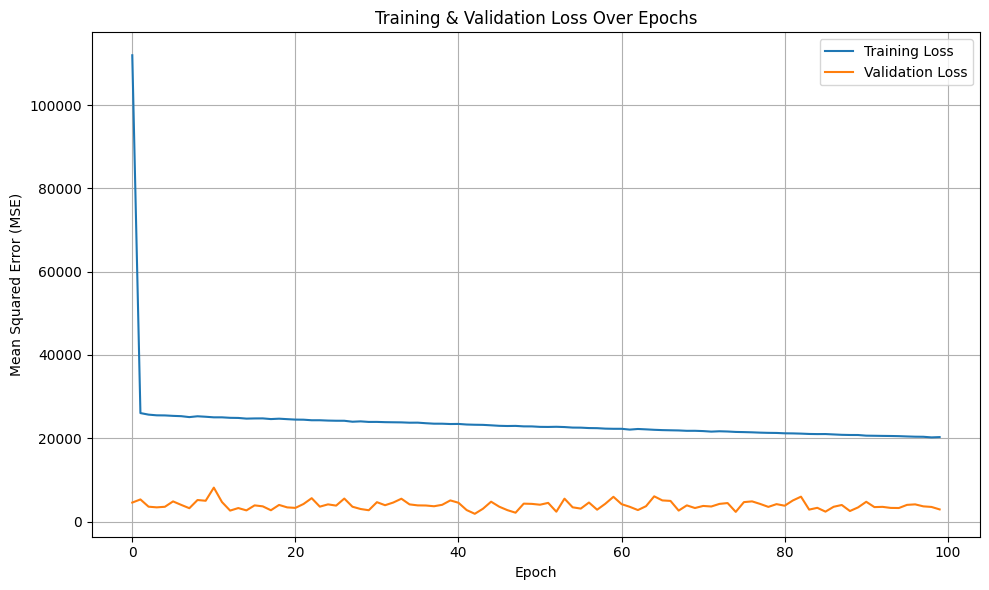

In [15]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


4164/4164 ━━━━━━━━━━━━━━━━━━━━ 3s 804us/step


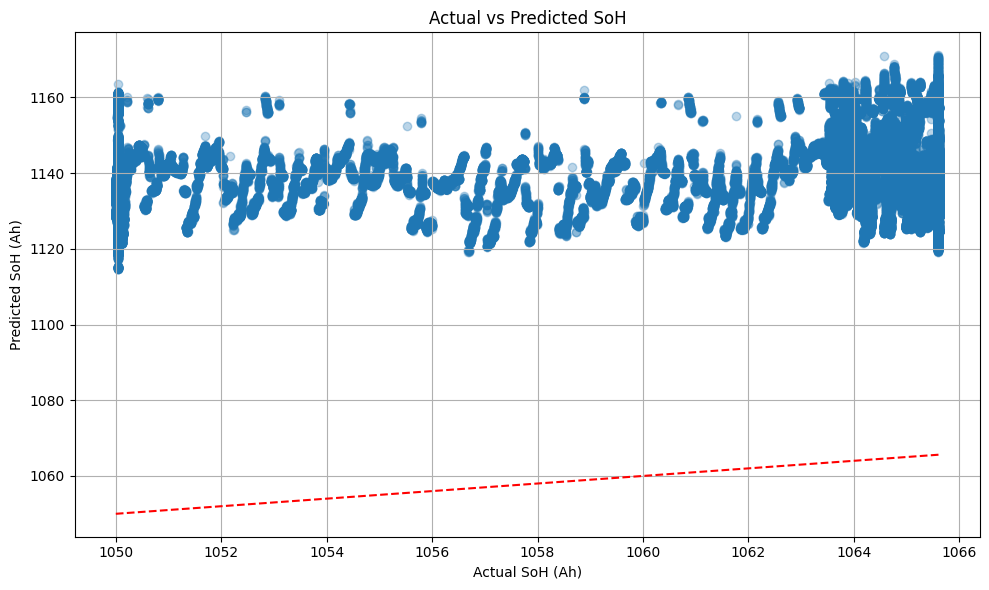

In [16]:
# Predict on test data
y_pred = model.predict(X_test)

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual SoH (Ah)")
plt.ylabel("Predicted SoH (Ah)")
plt.title("Actual vs Predicted SoH")
plt.grid(True)
plt.tight_layout()
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.show()


4164/4164 ━━━━━━━━━━━━━━━━━━━━ 3s 821us/step


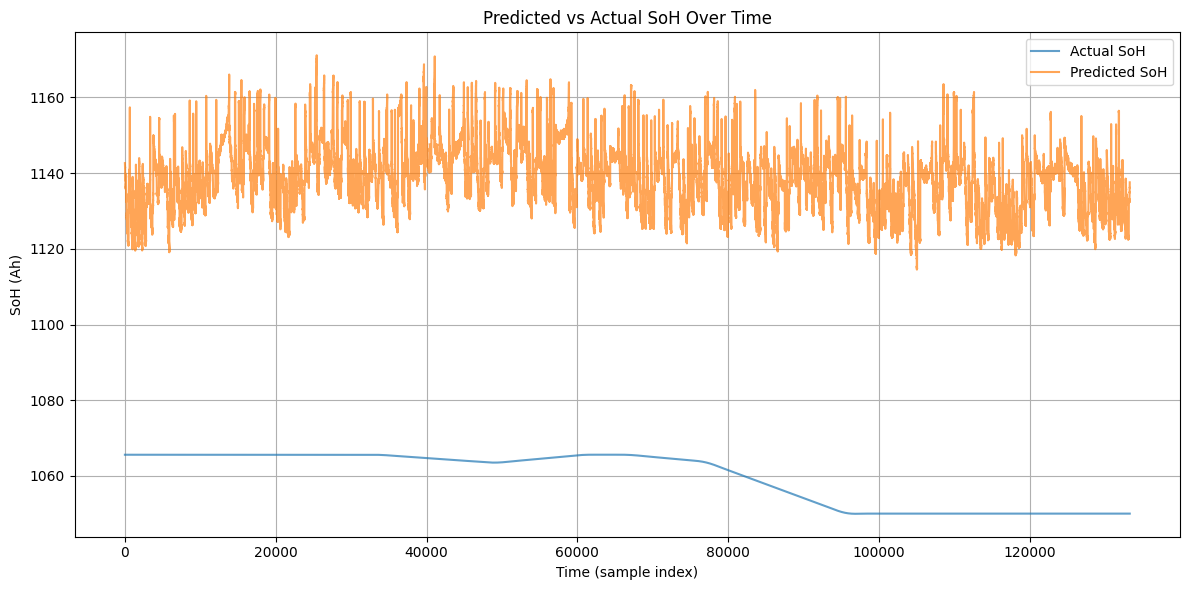

In [17]:
import numpy as np

# Predict on test set
y_pred = model.predict(X_test).flatten()

# Create a time index (optional: use actual timestamps if available)
time_index = np.arange(len(y_test))

# Sort by "time" for better continuity in the plot
sorted_idx = np.argsort(time_index)
sorted_time = time_index[sorted_idx]
sorted_actual = np.array(y_test)[sorted_idx]
sorted_pred = y_pred[sorted_idx]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(sorted_time, sorted_actual, label="Actual SoH", alpha=0.7)
plt.plot(sorted_time, sorted_pred, label="Predicted SoH", alpha=0.7)
plt.title("Predicted vs Actual SoH Over Time")
plt.xlabel("Time (sample index)")
plt.ylabel("SoH (Ah)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
